# Práctica 2

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Honi Github <a href = https://github.com/honi/uba-probabilidad-y-estadistica/blob/main/Soluciones/Pr%C3%A1ctica2.ipynb >Práctica 2</a>

## Ejercicio 1

De un lote que contiene 15 artículos, de los cuales 4 son defectuosos, se eligen 3 artículos
al azar con reposicion. Si llamamos X al número de artículos defectuosos entre los
seleccionados

### Pregunta A

Hallar la función de probabilidad puntual asociada a X y graficarla usando R.

In [10]:
iteraciones = 10000
nItems = 15
nDef = 4
nSel = 3

res = [0,0,0,0]
for x in range(iteraciones):
    sDef = 0
    for y in range(nSel):
        sel = np.random.randint(1,nItems + 1)
        if sel <= 4:
            sDef += 1
    res[sDef] += 1

for x in range(len(res)):
    print("x_{} proba puntual {}".format(x, res[x]/iteraciones))

x_0 proba puntual 0.3966
x_1 proba puntual 0.4367
x_2 proba puntual 0.1496
x_3 proba puntual 0.0171


### Pregunta B

Hallar la función de distribución acumulada de X y graficarla usando R.

Text(0.5, 1.0, 'Distribución de probabilidad puntual')

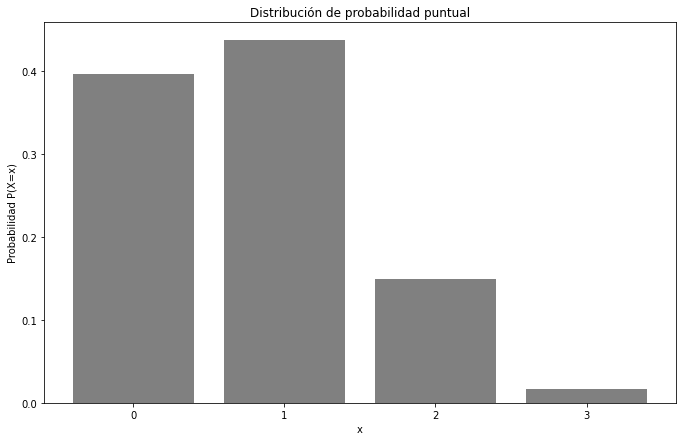

In [59]:
fig, ax = plt.subplots(figsize=(11.32,7))
[ax.bar(int(x), res[x]/iteraciones, color="grey") for x in range(len(res))]
plt.xticks(range(len(res)))
ax.set_xlabel("x")
ax.set_ylabel("Probabilidad P(X=x)")
ax.set_title("Distribución de probabilidad puntual")

Text(0.5, 1.0, 'Distribución de probabilidad acumulada')

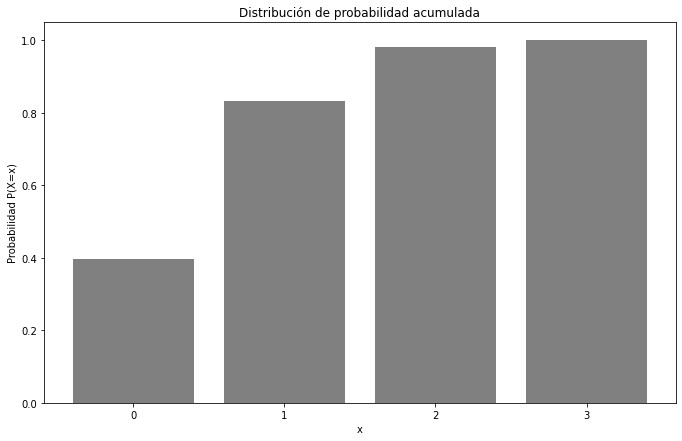

In [68]:
fig, ax = plt.subplots(figsize=(11.32,7))
ax.bar(0, sum(res[:1])/iteraciones, color="grey")
ax.bar(1, sum(res[:2])/iteraciones, color="grey")
ax.bar(2, sum(res[:3])/iteraciones, color="grey")
ax.bar(3, sum(res[:4])/iteraciones, color="grey")
plt.xticks(range(len(res)))
ax.set_xlabel("x")
ax.set_ylabel("Probabilidad P(X=x)")
ax.set_title("Distribución de probabilidad acumulada")

## Ejercicio 2

Sea X una variable aleatoria con función de distribución
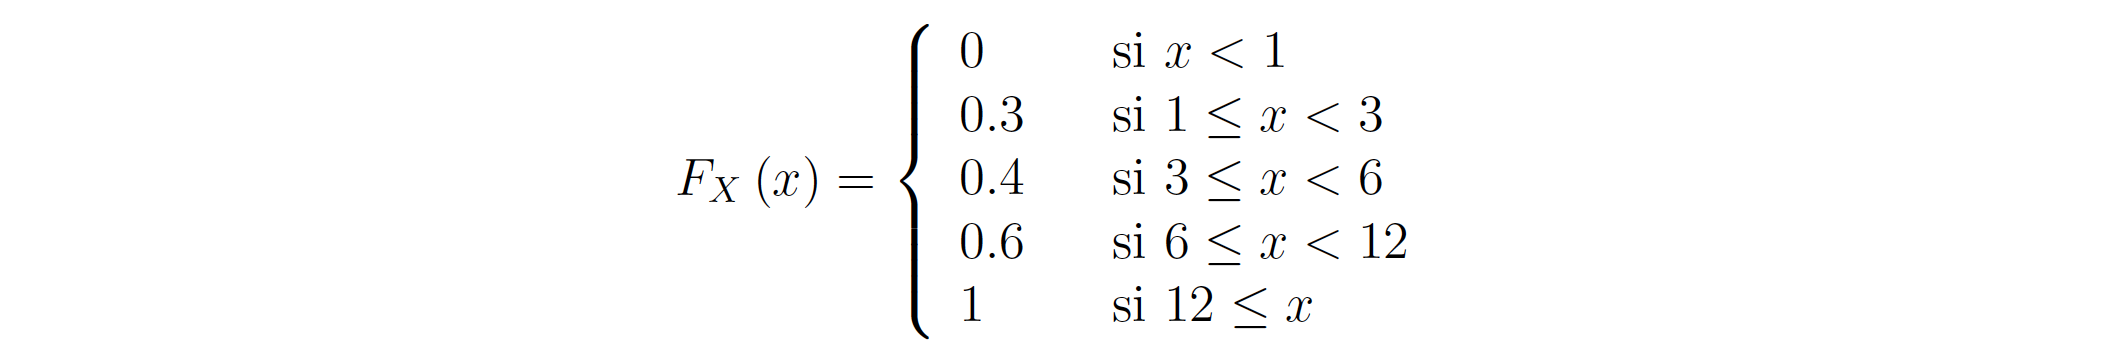

In [69]:
Fx0 = 0
Fx1 = 0.3
Fx3 = 0.4
Fx6 = 0.6
Fx12 = 1

<BarContainer object of 1 artists>

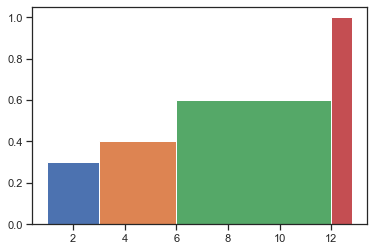

In [89]:
acum = [0, .3, .4, .6, 1]
plt.bar(1,Fx1,width=2,align="edge")
plt.bar(3,Fx3,width=3,align="edge")
plt.bar(6,Fx6,width=6,align="edge")
plt.bar(12,Fx12,align="edge")

### Pregunta A

Hallar la función de probabilidad puntual de X.

In [92]:
punt = [.3,.1,.2,.4]

###  Pregunta C

Utilizando el comando sample, generar 5 realizaciones de esta variable aleatoria
en R.

In [107]:
np.random.sample([1,3,6,12],5,True,punt)

array([1, 3, 1, 6, 1])

## Ejercicio 3

Definir una función en R que, dados dos vectores $x = (x1, ... , xn)$ y $p = (p1, ... , pn)$ y
un número real $t$, calcule $FX(t)$, es decir, la probabilidad de que de la variable aleatoria
discreta que toma valores $(x1,...,xn)$ con probabilidades $(p1,...,pn)$ respectivamente, sea
menor o igual que t. Probarla con la variable aleatoria del ejercicio 2.

In [126]:
def probAcum(x, p, t):
    acum = 0
    for i in range(len(x)):
        if x[i] <= t:
            acum += p[i]
        else:
            return acum
    return 1

#Pruba con datos del ej 2
ind = [1,3,6,12]
probas = [.3,.1,.2,.4]
ns = [0.5,1,5,8,10,12,15]
for x in ns:
    print("Fx({}) = {}".format(x, round(probAcum(ind,probas,x),5)))

Fx(0.5) = 0
Fx(1) = 0.3
Fx(5) = 0.4
Fx(8) = 0.6
Fx(10) = 0.6
Fx(12) = 1
Fx(15) = 1
